# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [24]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

Load feature names.

In [25]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

        
print 'Loaded feature names:', feature_names
print 'Loaded feature names (Length):', len(feature_names)

Loaded feature names: ['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-color=re

Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [26]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

print train_data[:1]
print train_labels[:5]

# Check that the shapes look right.
print train_data.shape, test_data.shape

[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.
   0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.
   0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
[1 0 0 1 0]
(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [27]:
def P1():
### STUDENT START ###
    pca = PCA()
    pca.fit(train_data)
    
    # Cumulative Variance Ratio 
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    
    for k in xrange(1,50):
        print "The first", k+1 ,"principal components explains" , cum_var[k]*100 ,"% of the variance."

### STUDENT END ###

P1()

The first 2 principal components explains 29.7278101488 % of the variance.
The first 3 principal components explains 39.9012666709 % of the variance.
The first 4 principal components explains 46.9646231059 % of the variance.
The first 5 principal components explains 50.8312694566 % of the variance.
The first 6 principal components explains 54.5120737641 % of the variance.
The first 7 principal components explains 57.6403128668 % of the variance.
The first 8 principal components explains 60.3740502195 % of the variance.
The first 9 principal components explains 62.9905406884 % of the variance.
The first 10 principal components explains 65.2214832563 % of the variance.
The first 11 principal components explains 67.2696562099 % of the variance.
The first 12 principal components explains 69.137986869 % of the variance.
The first 13 principal components explains 70.872408902 % of the variance.
The first 14 principal components explains 72.5567695477 % of the variance.
The first 15 principal

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Shape of PCA Transformed Training Set:  (7000, 2)
r 0
b 1


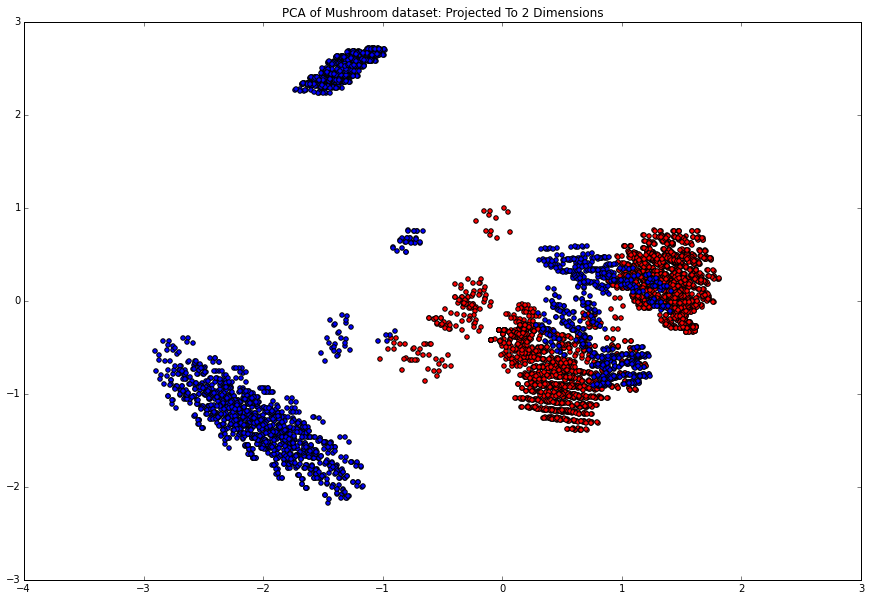

In [28]:
def P2():
### STUDENT START ###
    pca = PCA(n_components=2)
    global train_data_pca
    train_data_pca = pca.fit(train_data).transform(train_data)
    print "Shape of PCA Transformed Training Set: ", train_data_pca.shape
    
    plt.figure(figsize=(15,10))
    plt.title('PCA of Mushroom dataset: Projected To 2 Dimensions')

    for c, i in zip("rb", [0, 1]):
        print c,i
        plt.scatter(train_data_pca[train_labels == i, 0], train_data_pca[train_labels == i, 1], c=c)
    #plt.legend()

### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

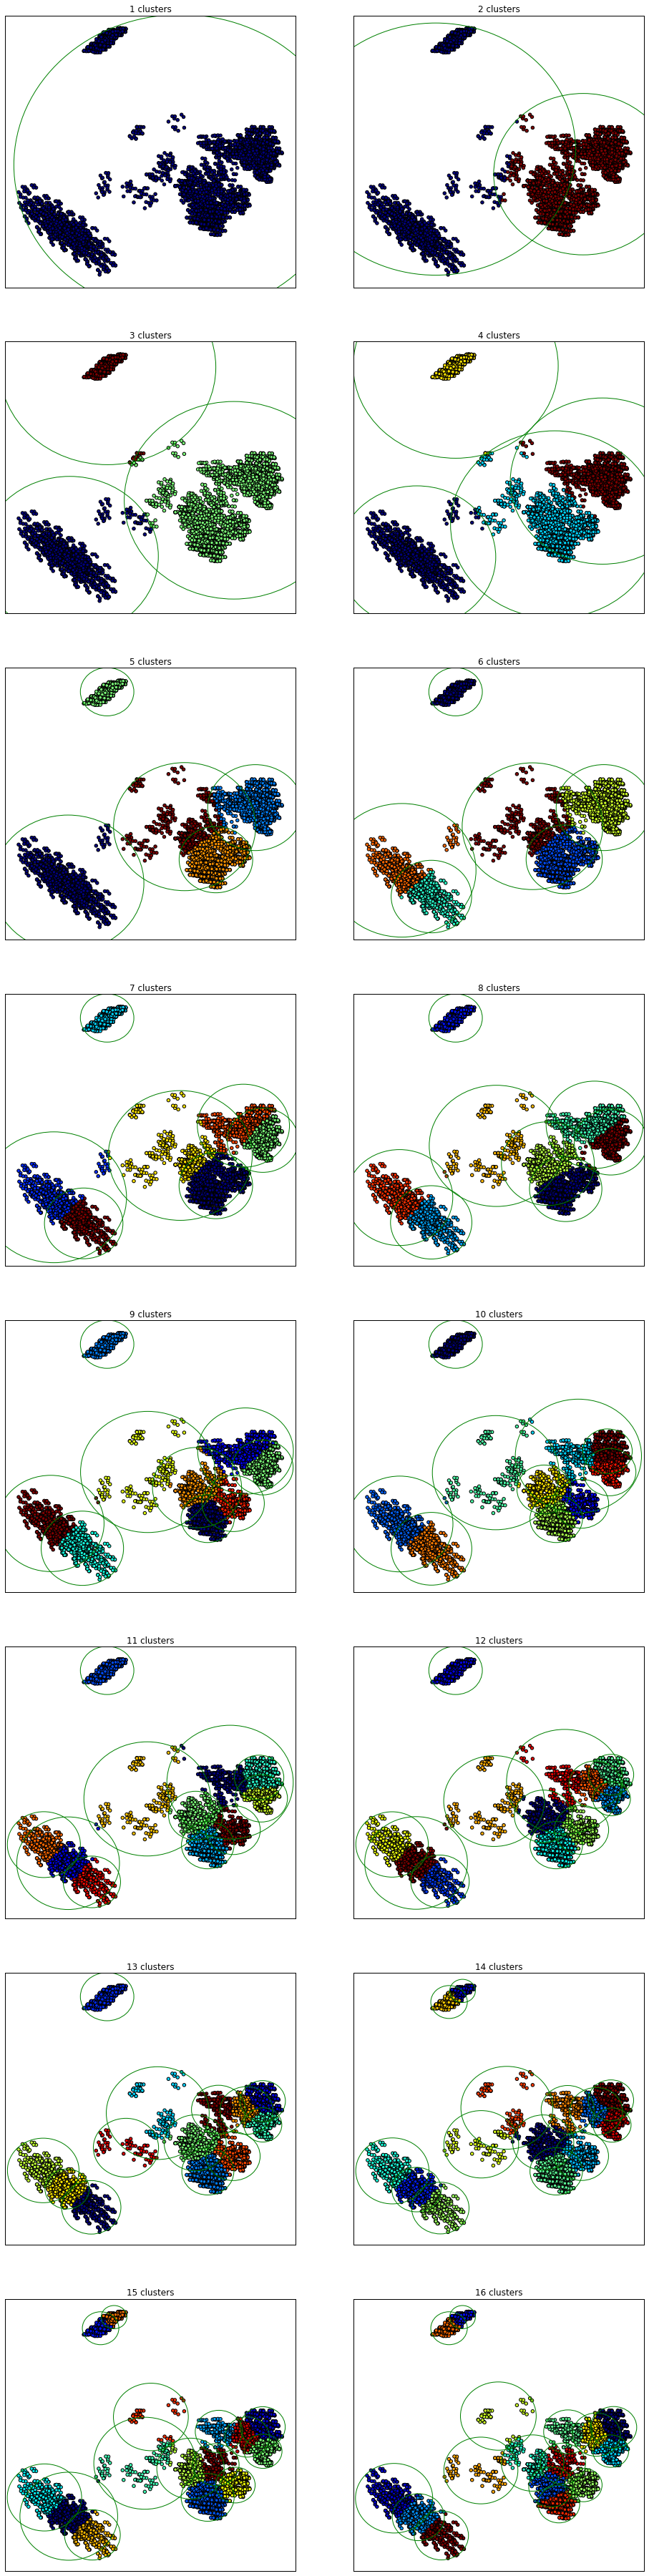

In [29]:
def P3():
### STUDENT START ###

    fig, ax = plt.subplots(8,2, figsize=(16,64), subplot_kw={'xticks':[], 'yticks':[]})
    
    for k in xrange(1,(16+1)):
        
        # Fit a Kmeans Clustering object with the correct number of clusters
        k_means = KMeans(n_clusters=k)
        k_means.fit(train_data_pca)
        y = k_means.labels_
        
        #get the distance vector matrix
        distances = k_means.transform(train_data_pca)
        
        # create basic scatter plots in each subplot for each clustering 
        ax.flat[k-1].scatter(train_data_pca[:, 0], train_data_pca[:,1], c=y.astype(np.float))
        ax.flat[k-1].set_title(str(k) + " clusters")
        
        '''
        print k
        print k_means.cluster_centers_
        print distances.shape
        print y
        '''
        
        for circles in range(1, k+1):
            
            #retrieve coordinates of cluster center
            centre_x = k_means.cluster_centers_[circles-1][0]
            centre_y = k_means.cluster_centers_[circles-1][1]
            
            # retrieve max distances for each centroid
            max_d = np.amax(distances[:,circles-1][y == circles-1])
            #print max_d
            
            #add the circle at center with radius max_d
            circ = plt.Circle((centre_x,centre_y), radius=max_d, color='g', fill=False)
            ax.flat[k-1].add_artist(circ)
    
    #plt.tight_layout
    plt.show()


### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

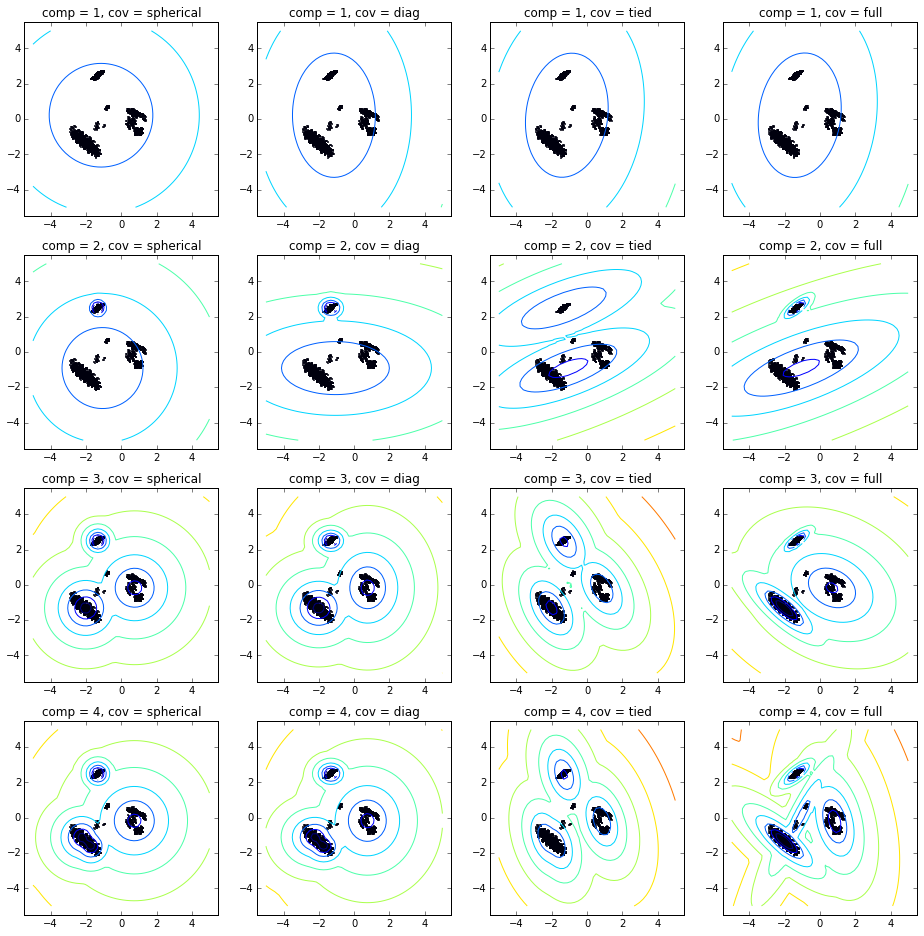

In [30]:
def P4():
### STUDENT START ###
    #retrieve positive cases from 2D data
    positive = train_data_pca[train_labels > 0]
    
    fig, ax = plt.subplots(4,4, figsize=(16,16)) #,subplot_kw={'xticks':[], 'yticks':[]}
    
    GMMtypes = ('spherical', 'diag', 'tied', 'full')
    
    figure = 0
    
    for GMMclusters in range(4):
        
        for GMMtype in GMMtypes:
            
            #fit a GMM object to 2D data
            clf = GMM(n_components=GMMclusters+1, covariance_type=GMMtype)
            clf.fit(positive)
                      
            # create basic scatter plots in each subplot for each clustering 
            ax.flat[figure].set_title("comp = " + str(GMMclusters+1) + ", cov = " + GMMtype)
           
        
            # Plot the estimated density contours
            # display predicted scores by the model as a contour plot
            x = np.linspace(-5.0, 5.0)
            y = np.linspace(-5.0, 5.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -clf.score_samples(XX)[0]
            Z = Z.reshape(X.shape)

            CS = ax.flat[figure].contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             levels=np.logspace(0, 3, 10))
            #CB = ax.flat[figure].colorbar(CS, shrink=0.8, extend='both')
            ax.flat[figure].scatter(positive[:, 0], positive[:, 1], .8)

            
            figure += 1
    
    plt.axis('tight')
    plt.show()

### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [31]:
def P5():
### STUDENT START ###
    #retrieve positive cases from 2D data
    positive = train_data_pca[train_labels == 1]
    
    #retrieve negative cases from 2D data
    negative = train_data_pca[train_labels == 0]

    #train the 2 requested GMM classifiers
    clf1 = GMM(n_components=4, covariance_type='full')
    clf1.fit(positive)
    
    clf2 = GMM(n_components=4, covariance_type='full')
    clf2.fit(negative)
    
    # reduce the dimentionality of the test set with the EXISTING PCA from TRAINING
    pca = PCA(n_components=2)
    test_data_pca = pca.fit(train_data).transform(test_data)

    #predict using both classifiers and collect the scores
    frompositive =  clf1.predict(test_data_pca)
    pos_score = clf1.score(test_data_pca)
        
    fromnegative = clf2.predict(test_data_pca)
    neg_score = clf2.score(test_data_pca)
    
    #predict based on weights from positive and negative GMM classifiers
    predicted = np.zeros((test_data_pca.shape[0]))
    for i in range(test_data_pca.shape[0]):        
        if pos_score[i] > neg_score[i]:
            predicted[i] = 1
        else:
            predicted[i] = 0
    
    expected = test_labels
    #print the accuracy metrics    
    print metrics.classification_report(expected, predicted)
    print "Prediction accuracy is ", metrics.accuracy_score(expected, predicted)*100, "%."

### STUDENT END ###

P5()

             precision    recall  f1-score   support

          0       0.89      0.98      0.93       406
          1       0.99      0.93      0.96       718

avg / total       0.95      0.95      0.95      1124

Prediction accuracy is  95.0177935943 %.


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [32]:
def P6():
### STUDENT START ###  
    # list of different covariance types
    cov_types = ['spherical','diag','tied','full']   
    # empty lists of parameters (to store number of parameters), details (to store parameter combinations),
    # accuracies (to store different accuracies)
    parameters = []
    details = []
    accuracies = []
    print 'running experiements'
    # iterate through different  pca components
    for pca_comp in range(1,51):
        # iterate through different  gmm components
        for gmm_comp in range(1,51):
            # iterate through different covariance types
            for cov_type in cov_types:
                # calculate total number of parameters
                num_parameters = get_num_parameters(pca_comp, gmm_comp, cov_type)
                # check if num_parameters is less than equal to 50
                if num_parameters <= 50:
                    # get model accuracy for given parameter combination
                    accuracy = get_model_accuracy(pca_comp, gmm_comp, cov_type)
                    # append details, parameter details, and acccuracies to corresponding lists
                    details.append('pca components : {0} GMM compnents  : {1} total : {2} covariance : {3}'.format(pca_comp, gmm_comp, num_parameters, cov_type))
                    parameters.append(num_parameters)
                    accuracies.append(accuracy)                            
                    # print current experient details
                    print 'pca components : {0} GMM compnents : {1} total : {2} covariance : {3} accuracy : {4}'.format(pca_comp, gmm_comp, num_parameters, cov_type, accuracy)
    print 'end of experiments'
    # get model with best accuracy with fewest components
    # maximum accuracy achieved
    max_accuracy = max(accuracies)
    # get indexes for maximum accuracies
    max_accuracies_indices = [i for i,v in enumerate(accuracies) if v == max_accuracy ]
    # get parameter counts for maximum accuracies
    parameters_with_max_accuracies = [parameters[i] for i in max_accuracies_indices]
    # get index of parameters with minimum value
    index_with_min_paramcount_max_accuracy = parameters_with_max_accuracies.index(min(parameters_with_max_accuracies))
    # get best parameter combination for which accuracy is maximum and number of parameters is minimum
    best_parameter_combination = details[max_accuracies_indices[index_with_min_paramcount_max_accuracy]]
    # print best parameter combination along with its accuracy
    print 'best combination : {0} accuracy : {1}'.format(best_parameter_combination, max_accuracy)

def get_num_parameters(pca_comp, gmm_comp, cov_type):
    # number of classes (2 in this problem)
    num_classes = 2 
    # total number of parameter in mean vector
    num_mean_parameter_per_class = pca_comp * gmm_comp 
    # number of parameter in cov matrix , set initial value of zero, will be set as per covariance type
    num_cov_parameter_per_class = 0    
    # set number of covariance parameter as per covariance type
    if cov_type == 'spherical':
        # spherical: a diagonal matrix with zeroes on the off diagonal, and one value on the diagonal
        # shape of component: a sphere
        # number of covariance parameters for D components in p dimensions: D
        num_cov_parameter_per_class = 1 * gmm_comp 
    if cov_type == 'diag':
        # diag: a diagonal matrix with zeroes on the off diagonal, and different values on each entry of the diagonal
        # shape of component: an ellipse, with axes aligned to the dimension axes
        # number of covariance parameters for D components in p dimensions: D*p
        num_cov_parameter_per_class = pca_comp * gmm_comp 
    if cov_type == 'tied':
        # tied: a full matrix; fixed across all compnents
        # shape of component: any ellipse like shape; fixed across all components
        # number of covariance parameters for D components in p dimensions: [p + p * (p-1) / 2]
        num_cov_parameter_per_class = (pca_comp + ((pca_comp * (pca_comp-1)) / 2)) 
    if cov_type == 'full':
        # full: a full matrix
        # shape of component: any ellipse like shape
        # number of covariance parameters for D components in p dimensions: D * [p + p * (p-1) / 2]
        num_cov_parameter_per_class = gmm_comp * (pca_comp + ((pca_comp * (pca_comp-1)) / 2))
    # return total number of parameters for all classes
    return (num_mean_parameter_per_class + num_cov_parameter_per_class)  * num_classes

        
def get_model_accuracy(pca_comp, gmm_comp, cov_type):
    # create a PCA with 2 components
    pca = PCA(n_components=pca_comp)
    # transform the train_data using PCA to two dimensions
    transformed_data = pca.fit_transform(train_data)  
    # select positive data using train_labels
    positive_data = transformed_data[np.where(train_labels ==1)]
    # select negative data using train_labels
    negative_data = transformed_data[np.where(train_labels ==0)]
    # create a Gaussian Mixture Model for positive data
    clf_positive = GMM(n_components=gmm_comp, covariance_type=cov_type)
    # fit the Gaussian Mixture Model
    clf_positive.fit(positive_data)
    # create a Gaussian Mixture Model for negative data
    clf_negative = GMM(n_components=gmm_comp, covariance_type=cov_type)
    # fit the Gaussian Mixture Model
    clf_negative.fit(negative_data)  
    # get log-probabilities to get probabilities
    # for positive
    positive_probs = clf_positive.score(pca.transform(test_data))  
    # for negative
    negative_probs = clf_negative.score(pca.transform(test_data))   
    # compare positive and negative probabilities
    predicted_labels = positive_probs > negative_probs
    # convert boolean result to integer
    predicted_labels = predicted_labels.astype(int)   
    # compute accuracies using actual and predicted labels
    return metrics.accuracy_score(test_labels, predicted_labels)
### STUDENT END ###
    
P6()

running experiements
pca components : 1 GMM compnents : 1 total : 4 covariance : spherical accuracy : 0.844306049822
pca components : 1 GMM compnents : 1 total : 4 covariance : diag accuracy : 0.844306049822
pca components : 1 GMM compnents : 1 total : 4 covariance : tied accuracy : 0.832740213523
pca components : 1 GMM compnents : 1 total : 4 covariance : full accuracy : 0.844306049822
pca components : 1 GMM compnents : 2 total : 8 covariance : spherical accuracy : 0.899466192171
pca components : 1 GMM compnents : 2 total : 8 covariance : diag accuracy : 0.899466192171
pca components : 1 GMM compnents : 2 total : 6 covariance : tied accuracy : 0.911921708185
pca components : 1 GMM compnents : 2 total : 8 covariance : full accuracy : 0.899466192171
pca components : 1 GMM compnents : 3 total : 12 covariance : spherical accuracy : 0.908362989324
pca components : 1 GMM compnents : 3 total : 12 covariance : diag accuracy : 0.908362989324
pca components : 1 GMM compnents : 3 total : 8 covar